In [131]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics

## model hyperparameter tuning
from sklearn.model_selection i

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import joblib
%matplotlib inline


In [132]:
df=pd.read_csv("WildBlueberryPollinationSimulationData.csv")

In [133]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [134]:
#drop Row#
df.drop(columns=['Row#'])

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [135]:
df.drop('Row#',axis=1,inplace=True)

In [136]:
df.shape

(777, 17)

In [137]:
##Finding null values in the dataset
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

clonesize               0.0
honeybee                0.0
bumbles                 0.0
andrena                 0.0
osmia                   0.0
MaxOfUpperTRange        0.0
MinOfUpperTRange        0.0
AverageOfUpperTRange    0.0
MaxOfLowerTRange        0.0
MinOfLowerTRange        0.0
AverageOfLowerTRange    0.0
RainingDays             0.0
AverageRainingDays      0.0
fruitset                0.0
fruitmass               0.0
seeds                   0.0
yield                   0.0
dtype: float64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [139]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [140]:
df.nunique()
# Print the number of unique values in each column here

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

### Univariate Analysis


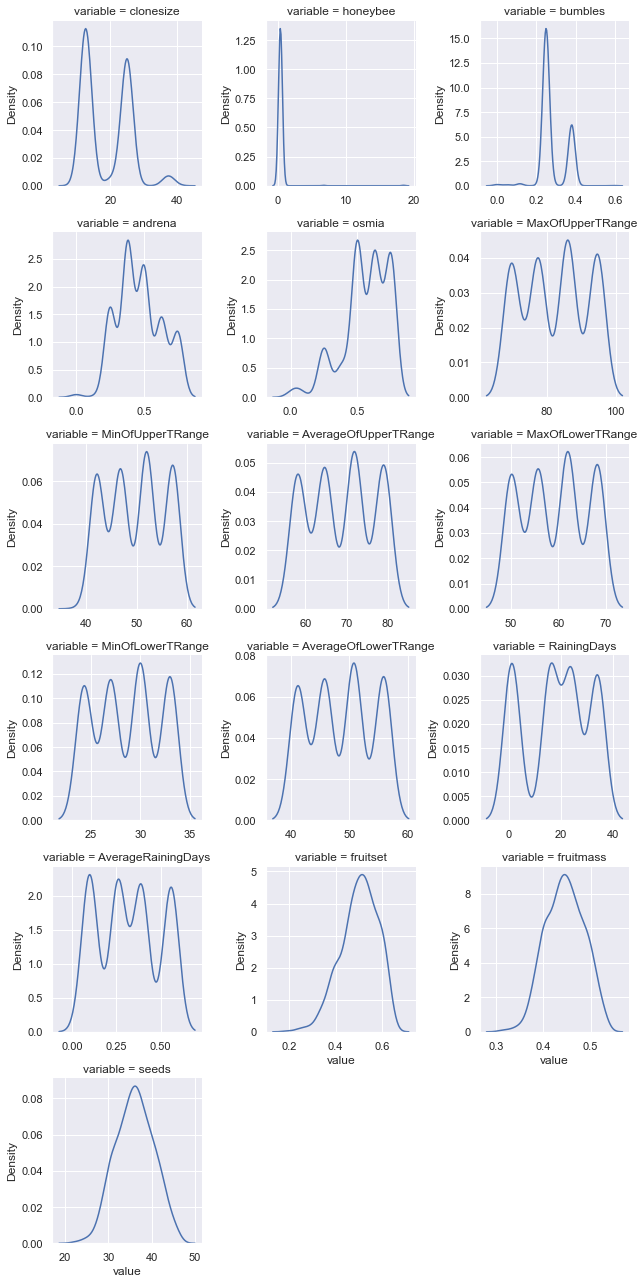

In [141]:
unpivot = pd.melt(df, df.describe().columns[-1], df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

###### Through this analysis we determine that the columns such as Honeybee has very less variability to be considered for prediction

### Finding out the Outliers

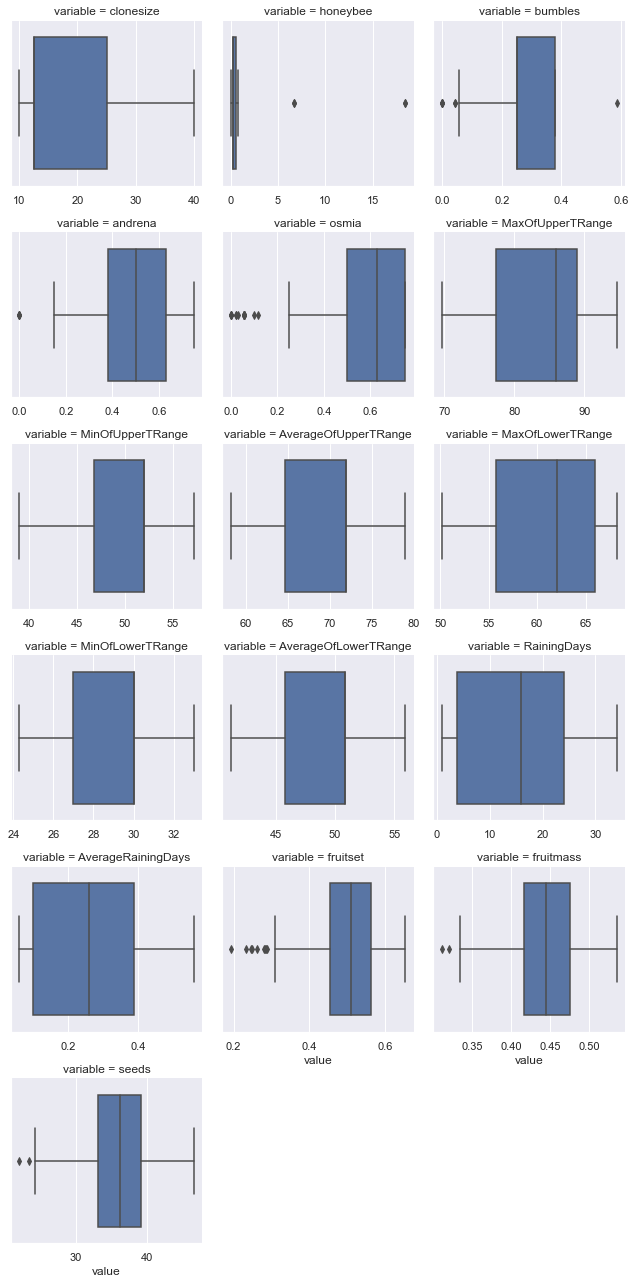

In [142]:
unpivot = pd.melt(df, df.describe().columns[-1], df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

### Interquartile range

In [143]:
q1 = df.quantile(0.25)
q2 = df.quantile(0.75)
iqr = q2 -q1
print(iqr)

clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
MaxOfUpperTRange          11.600000
MinOfUpperTRange           5.200000
AverageOfUpperTRange       7.200000
MaxOfLowerTRange          10.200000
MinOfLowerTRange           3.000000
AverageOfLowerTRange       5.000000
RainingDays               20.230000
AverageRainingDays         0.290000
fruitset                   0.106571
fruitmass                  0.059869
seeds                      6.123577
yield                   1897.334830
dtype: float64


### Removing the Outliers

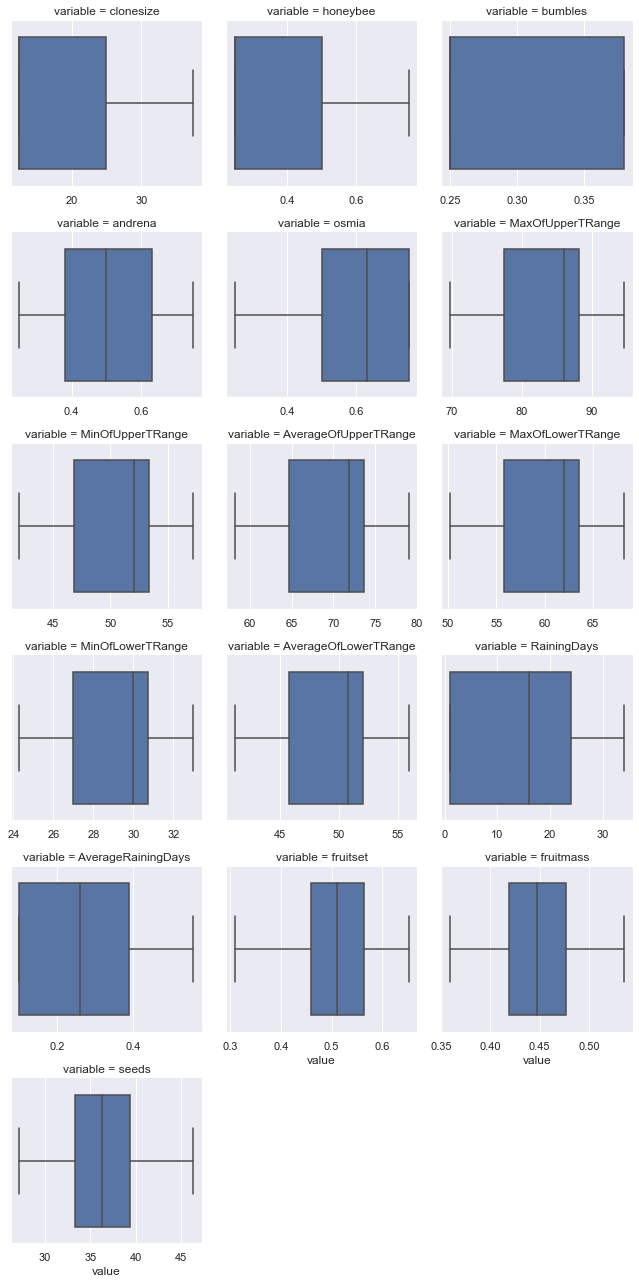

In [144]:
df_new = df[~((df < (q1 - 1.5 * iqr)) |(df > (q2 + 1.5 * iqr))).any(axis=1)]
unpivot = pd.melt(df_new, df_new.describe().columns[-1], df_new.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

###### Outliers skew the data so it's important to remove them

### Multivariate Analysis

<AxesSubplot:>

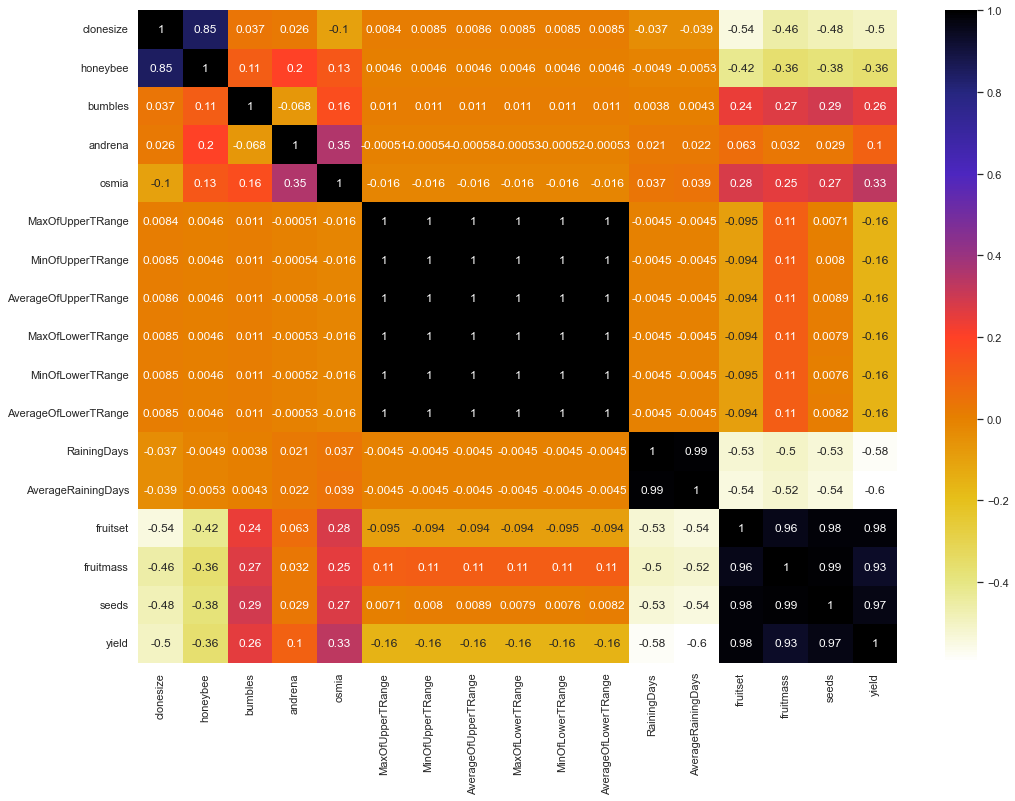

In [145]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df_new.corr(), annot=True, cmap=plt.cm.CMRmap_r)

###### Removing the multi-collinearity

## Preprocessing


###### Removing the irrelevant columns

In [146]:
df_new.drop(columns=[ 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee','fruitset', 'fruitmass'], axis=1, inplace=True)

In [147]:
df_new.columns

Index(['clonesize', 'bumbles', 'andrena', 'osmia', 'AverageOfUpperTRange',
       'AverageOfLowerTRange', 'AverageRainingDays', 'seeds', 'yield'],
      dtype='object')

### Standardization

In [148]:
X=df_new.drop('yield', axis=1)
Y=df_new['yield']

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler=MinMaxScaler()

In [151]:
X=scaler.fit_transform(X)

### Implementation of models

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)

### Linear Regression

In [155]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

ypred = lreg.predict(X_test)

In [156]:
mae_linear = mean_absolute_error(Y_test, ypred)
mse_linear = mean_squared_error(Y_test, ypred)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(Y_test, ypred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 109.194
MSE: 20348.817
RMSE: 142.649
R-Square: 0.987


### Knearest Neighbor

In [158]:
knn=KNeighborsRegressor()

In [159]:
knn.fit(X_train, Y_train)

ypred = knn.predict(X_test)

In [160]:
mae_knn = mean_absolute_error(Y_test, ypred)
mse_knn = mean_squared_error(Y_test, ypred)
rmse_knn = np.sqrt(mse_linear)
rsq_knn = r2_score(Y_test, ypred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 109.194
MSE: 20348.817
RMSE: 142.649
R-Square: 0.987


### Decision Tree

In [162]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train, Y_train)

ypred = dtree.predict(X_test)

In [163]:
mae_dt = mean_absolute_error(Y_test, ypred)
mse_dt = mean_squared_error(Y_test, ypred)
rmse_dt = np.sqrt(mse_linear)
rsq_dt = r2_score(Y_test, ypred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 109.194
MSE: 20348.817
RMSE: 142.649
R-Square: 0.987


### Random Forest Regressor

##### Randomized search cv

In [165]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [166]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [167]:
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [168]:
rf_randomcv.best_params_


{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 230}

In [169]:
ypred=rf_randomcv.predict(X_test)

In [170]:
mae_rsv = mean_absolute_error(Y_test, ypred)
mse_rsv = mean_squared_error(Y_test, ypred)
rmse_rsv = np.sqrt(mse_linear)
rsq_rsv = r2_score(Y_test, ypred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 109.194
MSE: 20348.817
RMSE: 142.649
R-Square: 0.987


##### GridSearch CV


In [171]:
param_grid = {
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'max_depth': [230], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [172]:
#### Fit the grid_search to the data
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [230], 'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [173]:
grid_search.best_estimator_


RandomForestRegressor(max_depth=230, max_features='log2', n_estimators=1500)

In [174]:
ypred=rf_randomcv.predict(X_test)

In [175]:
ypred=rf_randomcv.predict(X_test)

mae_gsv = mean_absolute_error(Y_test, ypred)
mse_gsv = mean_squared_error(Y_test, ypred)
rmse_gsv = np.sqrt(mse_linear)
rsq_gsv = r2_score(Y_test, ypred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 109.194
MSE: 20348.817
RMSE: 142.649
R-Square: 0.987


### XGBoost

In [176]:
from xgboost import XGBRegressor

In [177]:
xgb = XGBRegressor()

xgb.fit(X_train, Y_train)

ypred = xgb.predict(X_test)

In [178]:
mae_xg = mean_absolute_error(Y_test, ypred)
mse_xg = mean_squared_error(Y_test, ypred)
rmse_xg = np.sqrt(mse_linear)
rsq_xg = r2_score(Y_test, ypred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 109.194
MSE: 20348.817
RMSE: 142.649
R-Square: 0.987


### Model Performance Evaluation

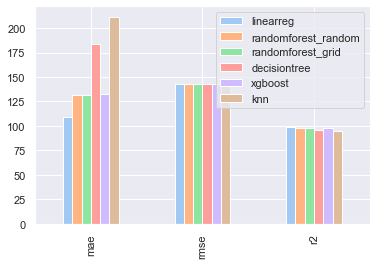

In [182]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest_random": {
        "mae": mae_rsv,
        "rmse": rmse_rsv,
        'r2': rsq_rsv*100
    },
    "randomforest_grid": {
        "mae": mae_gsv,
        "rmse": rmse_gsv,
        'r2': rsq_gsv*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },"xgboost": {
        "mae": mae_xg,
        "rmse": rmse_xg,
        'r2': rsq_xg*100},"knn": {
        "mae": mae_knn,
        "rmse": rmse_knn,
        'r2': rsq_knn*100}}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3],sns.color_palette("pastel")[4],sns.color_palette("pastel")[5]]);